## Описание данных и проекта

### Описание проекта 

#### Часть 1. Приоритизация гипотез.

**Краткое описания проекта:**   
Предстоит приоритизировать гипотезы, подготовленные вместе с отделом маркетинга для крупного интернет-магазина

**Цели и задачи:**
Приоритизировать подготовленные гипотезы с помощью фреймворков ICE и  RICE, установить приоритетные гипотезы, проанализировать как меняются приоритетные гипотезы в зависимости от применяемого фреймворка

**Описание исходных данных:**  
В первой части проекта мы будем анализировать датасет с гипотезами, которой включает краткое описание гипотезы и параметры Reach, Impact, Confidence и Efforts, оцененные по 10-ти бальной шкале.    

**План анализа данных:**
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.


#### Часть 2.  Анализ результатов A/B-теста

**Краткое описания проекта:**  
Предстоит проанализируйте результаты A/B-теста для крупного интернет-магазина.

**Цели и задачи:**
Принять решение по результатам теста и объяснить его. Очистить данные от аномальных значений. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Описание исходных данных:**  
После проведения A/B-теста мы получили 2 датасета: датасет, содержащий информацию о заказах и датасет, содержащий информацию о пользователях

**План анализа данных:**  
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделатьвыводы и предположени.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Посчитать  точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать  статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11.  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать  статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13.  Посчитать  статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14.  Принять решение по результатам теста и объяснить его. Варианты решений:  
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

## Часть 1

###  Откроем файлы с данными и изучим общую информацию. 

In [44]:
import pandas as pd #импортируем библиотеки
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from datetime import datetime, timedelta
import scipy.stats as stats


In [45]:
try:
    data_1 = pd.read_csv('hypothesis.csv')
except:
    data_1  = pd.read_csv('/datasets/hypothesis.csv')
    

In [46]:
display(data_1) # изучим датафрейм hypothesis
pd.set_option('display.max_colwidth', None) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [47]:
data_1.columns = data_1.columns.str.lower()#приведем к нижнему регистру названия столбцов 

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации гипотез. Посчитаем ICE SCORE по формуле:  

**ICE SCORE = Impact х Confidence/Efforts**	

In [48]:
data_1 ['ICE'] = data_1 ['impact']*data_1 ['confidence']/data_1 ['efforts'] #посчитаем ICE SCORE 
rating_ice = data_1 [['hypothesis','ICE']].sort_values(by='ICE', ascending = False) #отсортируем гипотезы по убыванию 
#приоритета
display (rating_ice)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод:** Наиболее перспективные гипотезы по ICE:
- 8.Запустить акцию, дающую скидку на товар в день рождения
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Посчитаем RICE SCORE для гипотез по формуле:

**RICE SCORE = Reach x Impact х Confidence/Efforts**	    

In [49]:
data_1['RICE'] = data_1['reach']*data_1['impact']*data_1['confidence']/data_1['efforts']#посчитаем RICE SCORE 
rating_rice = data_1 [['hypothesis','RICE']].sort_values(by='RICE', ascending = False)#отсортируем гипотезы по убыванию приоритета
display (rating_rice)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Наиболее перспективные гипотезы по RICE:
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Наиболее перспективные гипотезы по ICE:**
- 8.Запустить акцию, дающую скидку на товар в день рождения
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Наиболее перспективные гипотезы по RICE:**
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**В тройке перспективных гипотез по ICE и RICE есть 2 пересечения:**
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Ее параметр  impact максимальный, равен 10
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Ее параметр  reach максимальный, равен 10

Гипотеза 8 - наиболее перспективная по ICE (поскольку параметры impact и confidence равны 9), но она выпадает из тройки лидеров по RICE, поскольку ее параметр reach самый низкий среди остальных гипотез, он равен 1. Гипотеза 2 появляется  в тройке наиболее перспективных гипотез при применении фреймворка RICE, поскольку ее параметр reach равен 8, и в то же время ее параметр confidence равен 7, а efforts довольно низкий, равен 3.

**Вывод:** В первой части проекта мы занимались приоритизацией гипотез. Мы применили фреймворки ICE и RICE для приоритизации гипотез. Отсортировали гипотезы по убыванию приоритета. Мы выяснили, что Гипотеза 8 - наиболее перспективная по ICE  , но она выпадает из тройки лидеров по RICE. Гипотеза 2 появляется  в тройке наиболее перспективных гипотез при применении фреймворка RICE. В тройке перспективных гипотез по ICE и RICE есть 2 пересечения: Гипотеза 0 и Гипотеза 7.

## Часть 2

###  Откроем файлы с данными и изучим общую информацию. 

In [50]:
try:
    orders  = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders  = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')    

#### Датафрейм orders

In [51]:
display(orders.head(10)) # изучим первые 10 строчек датафрейма 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [52]:
orders.describe() # Получим первичное представление о статистических характеристиках датасета 

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [53]:
orders.info() # выведем основную информацию о датафрейме с помощью метода info()
print('Число дубликатов', orders.duplicated().sum()) # Проверим количество дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Число дубликатов 0


#### Датафрейм visitors

In [54]:
display(visitors.head(10)) # изучим первые 10 строчек датафрейма 

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [55]:
visitors.describe() # Получим первичное представление о статистических характеристиках датасета 

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [56]:
visitors.info() # выведем основную информацию о датафрейме с помощью метода info()
print('Число дубликатов', visitors.duplicated().sum()) # Проверим количество дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Число дубликатов 0


**Вывод:** В ходе первичного знакомства с данными, отметим, что в датафрейме **orders** отсутствуют пропущенные значения и явные дубликаты, всего строк 1 197. Значения в столбце date следует привести в формат datetime. В датафрейме **visitors** отсутствуют пропущенные значения и явные дубликаты, всего строк 62. Значения в столбце date следует привести в формат datetime.  Все буквы в названиях столбцов во всех датафреймах стоит привести к строчным и сделать запись в "змеином" формате.

### Предобработка данных

####  Датафрейм orders

Переименуем название столбцов transactionId и visitorId, приведем к строчному регистру и запишем названия в "змеином" формате, присвоим им более понятные названия.	

In [57]:
orders = orders.rename(columns={'transactionId': 'order_id', 'visitorId':'user_id'}) 

In [58]:
#Столбец date переведем в формат datetime
orders['date'] = pd.to_datetime(orders['date']) 

In [59]:
orders.info() # вновь выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1197 non-null   int64         
 1   user_id   1197 non-null   int64         
 2   date      1197 non-null   datetime64[ns]
 3   revenue   1197 non-null   int64         
 4   group     1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [60]:
#Определим пользователей, которые попали в обе группы
#для этого разобъем пользователей на группы в разные таблицы и найдем пересечение этих таблиц
user_groups_A = orders[orders['group']=='A'][['user_id', 'group']]
user_groups_B = orders[orders['group']=='B'][['user_id', 'group']]
data_intersection = user_groups_A.merge(user_groups_B, on='user_id', how='inner')


In [61]:
#Очистим датафрейм orders от пользователей, попавших в обе группы и присвоим датафрейму исходное название

orders_new = pd.merge(orders, data_intersection , how='outer', indicator=True)
orders = orders_new.loc[orders_new['_merge'] == 'left_only'].drop(['_merge','group_x','group_y'], axis=1)
display (orders)


,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
4,3797467345,1196621759,2019-08-15,9759,B
5,2282983706,2322279887,2019-08-15,2308,B
6,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
2245,3592955527,608641596,2019-08-14,16490,B
2246,2662137336,3733762160,2019-08-14,6490,B
2247,2203539145,370388673,2019-08-14,3190,A
2248,1807773912,573423106,2019-08-14,10550,A


####  Датафрейм visitors

In [62]:
#Столбец date переведем в формат datetime
visitors['date'] = pd.to_datetime(visitors['date']) 

In [63]:
visitors.info() # вновь выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод:** В ходе предобработки данных, мы изменили названия столбцов  - буквы в названиях столбцов привели к строчным и сделали запись в "змеином" формате. Значения в столбцах с датами привели в формат datetime. Из таблицы orders удалили пользователей, которые попали в обе группы.

### Анализ результатов A/B-теста

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulative_data со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [64]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [65]:
#cоберём агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [66]:
#аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [67]:
# объединяем кумулятивные данные в одной таблице и переименуем столбцы
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


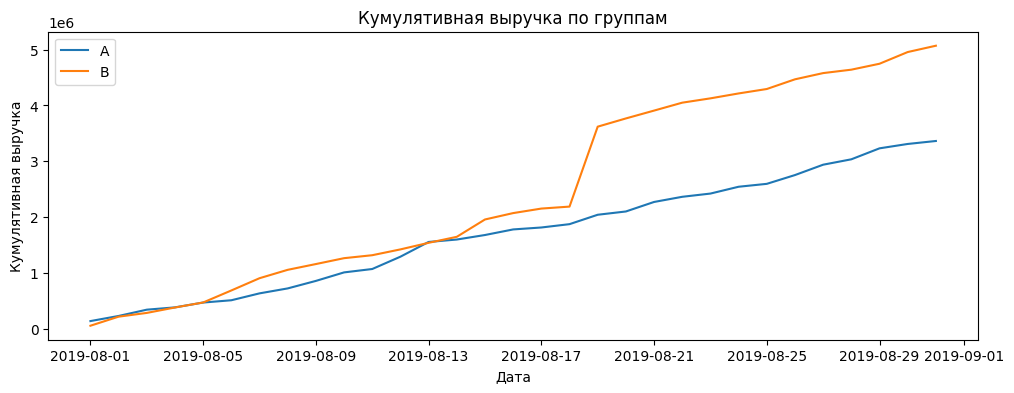

In [68]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(12,4))
plt.xlabel('Дата')  # название оси X
plt.ylabel('Кумулятивная выручка')# название оси Y
plt.title('Кумулятивная выручка по группам')  # название графика

# Строим график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend() 
plt.show()

**Вывод:** Выручка почти равномерно увеличивается в течение всего теста, но в группе В кумулятивная выручка стабильно, хотя и незначительно выше. В группе В наблюдаем скачек графика выручки в точке около 18-19 августа 2019 это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

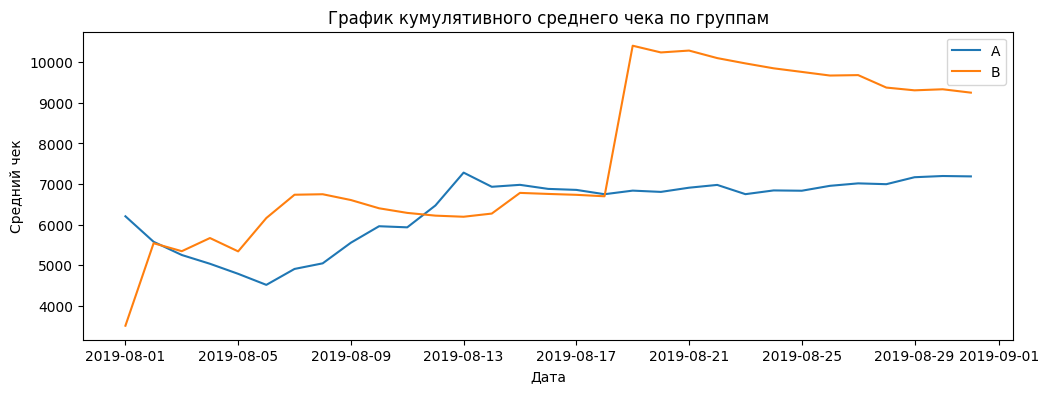

In [69]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12,4))
plt.xlabel('Дата')  # название оси X
plt.ylabel('Средний чек')# название оси Y
plt.title('График кумулятивного среднего чека по группам')  # название графика

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.legend()
plt.show()

**Вывод:** В группе В средний чек практически все время выше, чем в группе А. Для группы А средний чек стабилизируется раньше, чем для группы В, и на более низком уровне, чем в группе В.  В обоих группах мы наблюдаем всплески, это  сигнализирует о появлении очень дорогих заказов в выборке. 

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


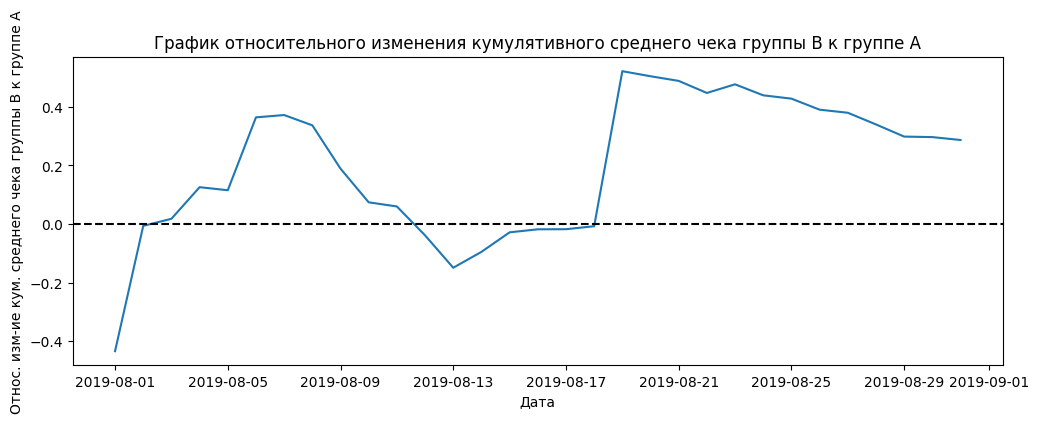

In [70]:
#Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 
# собираем данные в одном датафрейме
merged_cum_rev= cumulative_revenue_A.merge(cumulative_revenue_B,left_on='date',right_on='date', how='left', suffixes=['A', 'B'])

display (merged_cum_rev.head(10))
# cтроим график отношения средних чеков
plt.figure(figsize=(12,4))
plt.xlabel('Дата')  # название оси X
plt.ylabel('Относ. изм-ие кум. среднего чека группы B к группе А')# название оси Y
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')  # название графика
plt.plot(merged_cum_rev ['date'], (
    merged_cum_rev ['revenueB']/merged_cum_rev ['ordersB'])/(merged_cum_rev['revenueA']/merged_cum_rev['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()


**Вывод:** В нескольких точках график различия между сегментами резко «скачет». Это значит, что точно присутствуют крупные заказы и выбросы

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

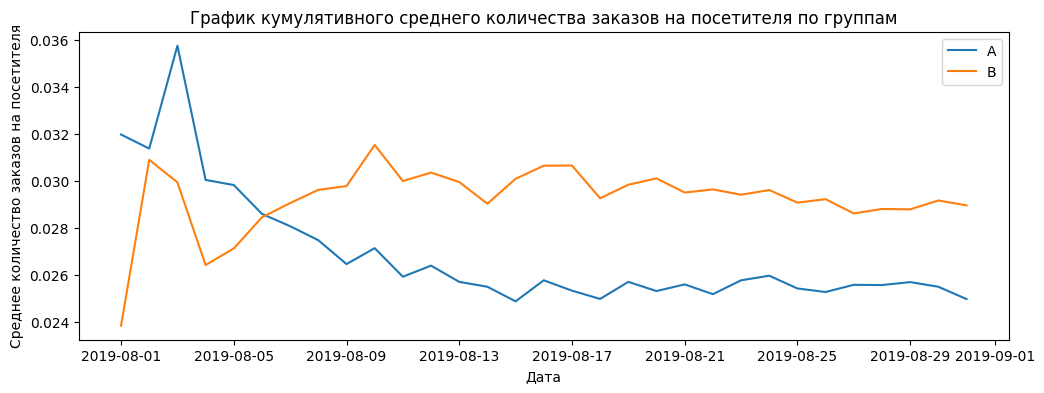

In [71]:
#Количество заказов на посетителя это фактически есть конверсия посетителей в покупателей, добавим в наши кумулятивные данные
#столбец, в котором рассчитаем конверсию
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A

cumulative_data_A  = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_B = cumulative_data[cumulative_data ['group']=='B']

# строим графики
plt.figure(figsize=(12,4))
plt.xlabel('Дата')  # название оси X
plt.ylabel('Cреднее количество заказов на посетителя')# название оси Y
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')  # название графика
plt.plot(cumulative_data_A ['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.show()



**Вывод:** Фактически симметричный график получился.  Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

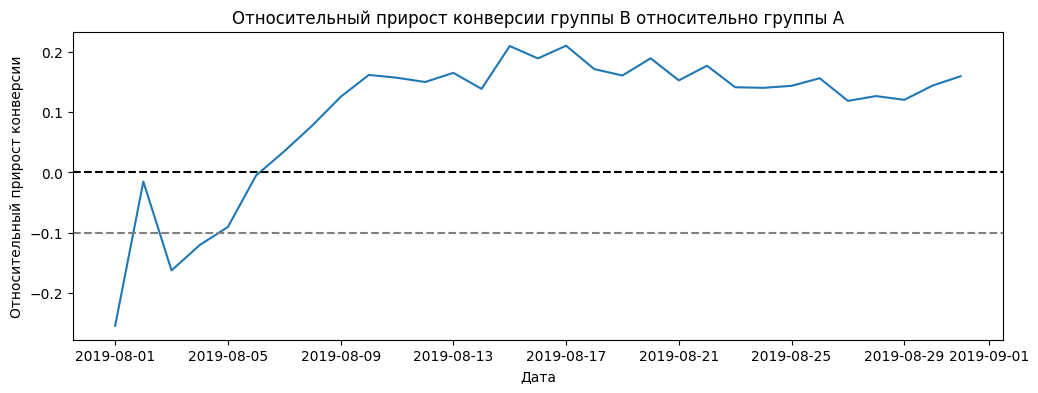

In [72]:
#Построим график относительного различия кумулятивных конверсий
merged_cum_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,4))
plt.xlabel('Дата')  # название оси X
plt.ylabel('Относительный прирост конверсии')# название оси Y
plt.title('Относительный прирост конверсии группы B относительно группы A')  # название графика
plt.plot(merged_cum_conversions ['date'], merged_cum_conversions ['conversionB']/merged_cum_conversions ['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()


**Вывод:** Группа B стабильно лучше группы A по конверсии, различие увеличивается со временем, затем стабилизируется

#### Построим точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [73]:
#Посчитаем количество заказов по пользователям в новой таблице
orders_by_users = (orders.groupby('user_id', as_index=False).agg({'order_id': 'nunique'}))
orders_by_users.columns = ['user_id', 'orders'] #переименуем столбцы
display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


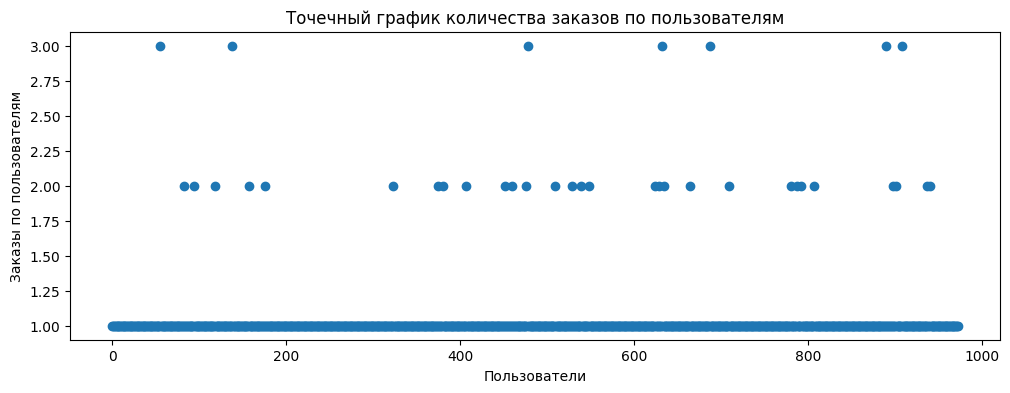

In [74]:
#Построим точечную диаграмму числа заказов на одного пользователя

plt.figure(figsize=(12,4))
plt.xlabel('Пользователи')  # название оси X
plt.ylabel('Заказы по пользователям')# название оси Y
plt.title('Точечный график количества заказов по пользователям')  # название графика
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.show()


 **Вывод:** Большинство пользователей с 1 заказом, но также пользователи  с 2 заказами, их точная доля не ясна. Надо разобраться, что считать аномалиями.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [75]:
#Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя
print(np.percentile(orders_by_users['orders'], [ 95, 99])) 


[1. 2.]


 **Вывод:** Не более 5% пользователей оформляли больше чем 1 заказа, не более чем 1% пользователей оформили 2 заказа. Разумно выбрать 1 заказ на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Построим точечный график стоимостей заказов. Сделайте выводы и предположения.


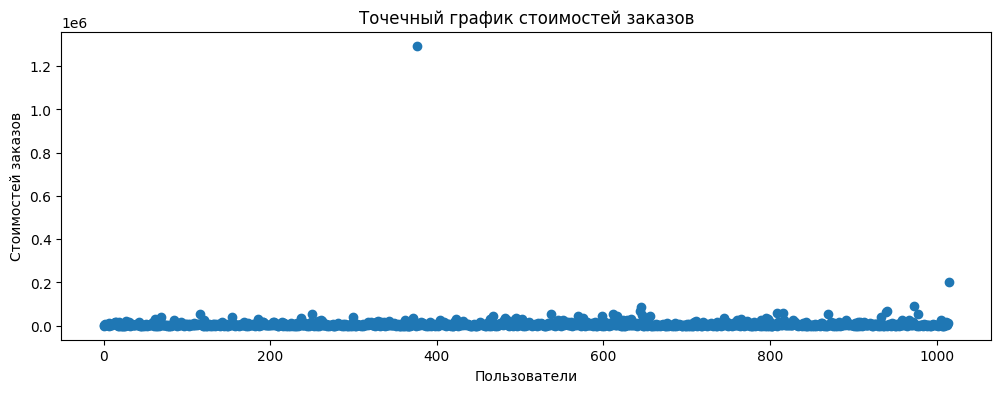

In [76]:
plt.figure(figsize=(12,4))
plt.xlabel('Пользователи')  # название оси X
plt.ylabel('Стоимостей заказов')# название оси Y
plt.title('Точечный график стоимостей заказов')  # название графика
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

In [77]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,order_id,user_id,date,revenue,group
1520,590470918,1920142716,2019-08-19,1294500,B
2249,3936777065,2108080724,2019-08-15,202740,B
2203,666610489,1307669133,2019-08-13,92550,A
1853,3668308183,888512513,2019-08-27,86620,B
1852,3603576309,4133034833,2019-08-09,67990,A
2169,1348774318,1164614297,2019-08-12,66350,A
2167,316924019,148427295,2019-08-12,65710,A
2042,1347999392,887908475,2019-08-21,60450,A
2034,2420050534,4003628586,2019-08-08,58550,B
1697,4071177889,3931967268,2019-08-07,53904,B


 **Вывод:** Точечный график в данном случае оказался малоинформативен, поскольку присутствует один заказ со стоимостью 1 294 500 рублей. По графику сложно выбрать границу аномальных заказов, можно только отметить, что большинство заказов по стоимости не превышают 100 000. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Следует посчитать 95-й и 99-й перцентили стоимости заказов.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [78]:
#Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя
print(np.percentile(orders['revenue'], [ 95, 99])) 

[26785. 53904.]


 **Вывод:** Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Разумно выбрать 26 785 рублей  за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней. 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы.   
- H0 : различий в среднем количестве заказов между группами А и В нет.  
- H1:   различия в среднем количестве заказов  между группами А и В есть.

In [79]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']] #отберем данные по посетителям для группы А по  дням
visitors_A_daily.columns = ['date', 'visitors_perdate_A']

#cоберём кумулятивные  данные по дням о посетителях по группе А
visitors_A_cum = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_perdate_A': 'sum'}), axis=1,)

visitors_A_cum.columns = ['date', 'visitors_cum_A']

# сделаем тоже самое для группы В
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_perdate_B']

visitors_B_cum= visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg({'date': 'max', 'visitors_perdate_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cum.columns = ['date', 'visitors_cum_B']

#отберем данные по заказам для группы А по дням
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_perdate_A', 'revenue_perdate_A']

#cоберём кумулятивные  данные по дням о заказах по группе А
orders_A_cum = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_perdate_A': 'sum', 'revenue_perdate_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_A_cum.columns = ['date','orders_cum_A','revenue_cum_A']


# сделаем тоже самое для группы В
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_perdate_B', 'revenue_perdate_B']

orders_B_cum = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_perdate_B': 'sum', 'revenue_perdate_B': 'sum'}), axis=1,).sort_values(by=['date'])

orders_B_cum.columns = ['date','orders_cum_B', 'revenue_cum_B',]

#объединим данные в одну таблицу
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cum, left_on='date', right_on='date', how='left')
    .merge(orders_B_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cum, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,orders_perdate_A,revenue_perdate_A,orders_perdate_B,revenue_perdate_B,orders_cum_A,revenue_cum_A,orders_cum_B,revenue_cum_B,visitors_perdate_A,visitors_perdate_B,visitors_cum_A,visitors_cum_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**Столбцы в объединенной таблице:** 

**orders_perdate_A** — количество заказов в выбранную дату в группе A;  
**revenue_perdate_A** — суммарная выручка в выбранную дату в группе A;  
**orders_perdate_B** — количество заказов в выбранную дату в группе B;  
**revenue_perdate_B** — суммарная выручка в выбранную дату в группе B;  
**orders_cum_A**  — суммарное число заказов до выбранной даты включительно в группе A;  
**revenue_cum_A** — суммарная выручка до выбранной даты включительно в группе A;  
**orders_cum_B** — суммарное количество заказов до выбранной даты включительно в группе B;  
**revenue_cum_B** — суммарная выручка до выбранной даты включительно в группе B;  
**visitors_perdate_A** — количество пользователей в выбранную дату в группе A;  
**visitors_perdate_B** — количество пользователей в выбранную дату в группе B;  
**visitors_cum_A** — количество пользователей до выбранной даты включительно в группе A;  
**visitors_cum_B** — количество пользователей до выбранной даты включительно в группе B.

In [80]:
#Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

#Создадим таблицу, в которой, для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов для группы А 
orders_byusers_A = ( orders[orders['group'] == 'A'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique}))
orders_byusers_A.columns = ['user_id', 'orders']

#Сделаем тоже самое для группы В
orders_byusers_B = (orders[orders['group'] == 'B'].groupby('user_id', as_index=False).agg({'order_id': pd.Series.nunique}))
orders_byusers_B.columns = ['user_id', 'orders']

Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [81]:
sample_A = pd.concat(
    [orders_byusers_A['orders'], pd.Series(0, index=np.arange(data['visitors_perdate_A'].sum()-len(orders_byusers_A['orders'])
            ),name='orders',),],axis=0,)

sample_B = pd.concat(
    [orders_byusers_B['orders'], pd.Series(0,index=np.arange(data['visitors_perdate_B'].sum()-len(orders_byusers_B['orders'])
            ), name='orders',),], axis=0,)

#Применим критерий  Манна-Уитни, выведем p-value, округлив его до трёх знаков после запятой
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

#Выведем относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего числа заказов группы B:',"{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))
 

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод:** p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. 
Относительный выигрыш группы B равен 16%.
Однако надо иметь ввиду, что наши данные не очищены от аномальных значений.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- H0 : различий в среднем чеке между группами нет.   
- H1: различия в среднем чеке между группами есть.

In [82]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке 
#с заказов. 

print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный прирост среднего чека группы B: 0.287


**Вывод:** P-value равен 0.829, это значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Таким образом, наблюдаемое различие в 28.7%  не является статистически значимым.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785  рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 1 — users_with_many_orders и пользователей, совершивших заказы дороже 26 785  — users_with_expensive_orders. Объединим их в таблице abnormal_users. 

In [83]:
user_lim = 1 # зададим границы нормальныз значений

users_with_many_orders = pd.concat([orders_byusers_A[orders_byusers_A['orders'] > user_lim ]['user_id'],
        orders_byusers_B[orders_byusers_B['orders'] > user_lim ]['user_id'],],axis=0,)

revenue_lim = 26785 # зададим границы нормальныз значений

users_with_expensive_orders = orders[orders['revenue'] > revenue_lim ]['user_id']

abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values())

print (abnormal_users.head(5))
print (abnormal_users.shape[0]) #Узнаем, сколько всего аномальных пользователей атрибутом shape.

1660    113298937
2167    148427295
2024    204675465
33      249864742
1793    358944393
Name: user_id, dtype: int64
86


**Вывод:** Всего 86 аномальных пользователей. 

In [84]:
#Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

#подготовим очищенные от аномалий выборки количества заказов по пользователям по группам теста
sample_A_filtered = pd.concat([
        orders_byusers_A[np.logical_not(orders_byusers_A['user_id'].isin(abnormal_users))]['orders'], pd.Series(0,index=np.arange(
                data['visitors_perdate_A'].sum() - len(orders_byusers_A['orders'])), name='orders',), ], axis=0,)

sample_B_filtered = pd.concat([
        orders_byusers_B[np.logical_not(orders_byusers_B['user_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(
                data['visitors_perdate_B'].sum() - len(orders_byusers_B['orders'])), name='orders',),], axis=0,)

In [85]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print('Относительный прирост среднего числа заказов группы B:','{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

p-value: 0.016
Относительный прирост среднего числа заказов группы B: 0.174


**Вывод:**: Результаты по среднему количеству заказов по «очищенным» данным практически не изменились.  p-value = 0.016 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. 
Относительный выигрыш группы B равен 17.4%.  

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [86]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu( orders[
    np.logical_and(orders['group'] == 'A',np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],)[1]))

print('Относительный прирост среднего чека группы B:',
    "{0:.3f}".format(orders[np.logical_and( orders['group'] == 'B',
    np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean()/ orders[
    np.logical_and(orders['group'] == 'A', np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean()- 1))

p-value: 0.727
Относительный прирост среднего чека группы B: -0.034


**Вывод:**: Теперь , средний чек группы B немного ниже среднего чека группы A. Относительный проигрыш составляет 3.4%. P-value  по «очищенным» данным уменьшился равен 0.727, это значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Таким образом, наблюдаемое различие в 3.4% не является статистически значимым.

#### Приятие решения по результатам теста.


Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Имеющиеся факты:**  
1. При расчете статистической значимости различий в среднем количестве заказов на посетителя между группами P-value для "сырых" и "очищенных" данных меньше 0.05. значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. Есть статистически значимых различия в среднем числе заказов на посетителя между группами.
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Таким образом, наблюдаемое различие в среднем количестве заказов на посетителя между группами не является статистически значимым.
3. Результаты по среднему количеству заказов по «очищенным» данным практически не изменились. p-value = 0.016 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 17.4%, наблюдаемое различае является статистически значимым.
4. График относительного изменения кумулятивного среднего чека группы B к группе A, по очищеным от аномальных значений, данным говорит о том,  средний чек группы B немного ниже среднего чека группы A. Относительный проигрыш составляет 3.4%. P-value  по «очищенным» данным уменьшился равен 0.727, это значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Таким образом, наблюдаемое различие в 3.4% не является статистически значимым.


Исходя их изложенных фактов предлагается остановить тест, зафиксировать победу группы В.

## Общие выводы:

### Выводы по Части 1

В первой части проекта мы занимались приоритизацией гипотез. Мы применили фреймворки ICE и RICE для приоритизации гипотез. Отсортировали гипотезы по убыванию приоритета.

**Наиболее перспективные гипотезы по ICE:**
- 8.Запустить акцию, дающую скидку на товар в день рождения
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Наиболее перспективные гипотезы по RICE:**
- 7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Мы выяснили, что Гипотеза 8 - наиболее перспективная по ICE (поскольку параметры impact и confidence равны 9) , но она выпадает из тройки лидеров по RICE, поскольку ее параметр reach самый низкий среди остальных гипотез, он равен 1. Гипотеза 2 появляется  в тройке наиболее перспективных гипотез при применении фреймворка RICE, поскольку ее параметр reach равен 8, и в то же время ее параметр confidence равен 7, а efforts довольно низкий, равен 3.  В тройке перспективных гипотез по ICE и RICE есть 2 пересечения: Гипотеза 0 и Гипотеза 7.

### Выводы по Части 2

  Во второй части проекта мы анализировали данные результатов проведенного A/B-теста. Сначала мы ознакомились с датафреймами и провели предобработку данных. В ходе предобработки данных, мы изменили названия столбцов - буквы в названиях столбцов привели к строчным и сделали запись в "змеином" формате. Значения в столбцах с датами привели в формат datetime.  
Далее мы построили  график кумулятивной выручки по группам, мы обнаружили, что выручка почти равномерно увеличивается в течение всего теста, но в группе В кумулятивная выручка стабильно, хотя и незначительно выше. В группе В наблюдаем скачек графика выручки в точке около 18-19 августа 2019 это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.  
После этого мы построили график кумулятивного среднего чека по группам, мы установили, что в группе В средний чек практически все время выше, чем в группе А. Для группы А средний чек стабилизируется раньше, чем для группы В, и на более низком уровне, чем в группе В. В обоих группах мы обнаружили всплески, и предположили, что это сигнализирует о появлении очень дорогих заказов в выборке.  
Далее мы построили график относительного изменения кумулятивного среднего чека группы B к группе A, на основании него мы заключили, что в нескольких точках график различия между сегментами резко «скачет». Это значит, что точно присутствуют крупные заказы и выбросы.  
После этого мы построили график кумулятивного среднего количества заказов на посетителя по группам, он фактически  получился симметричный. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.  
Следующим шагом было построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. На нем мы обнаружили, что Группа B стабильно лучше группы A по конверсии,  различие увеличивается со временем, затем стабилизируется.   
Построение точечного графика количества заказов по пользователям и расчет 95-ого и 99-ого перцентилей количества заказов на пользователя позволили выбрать границу для определения аномальных пользователей.  Мы определили, что не более 5% пользователей оформляли больше чем 1 заказа, не более чем 1% пользователей оформили 2 заказа. Разумным, мы сочли, выбрать 1 заказ на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.  
Построение точечного графика стоимости заказов по пользователям и расчет 95-ого и 99-ого перцентилей стоимости заказов на пользователя позволили выбрать границу для определения аномальных заказов.  Мы определили, что не более 5% заказов дороже  26 785 рублей и не более 1% дороже 53 904 рублей. Разумно выбрать  26 785 рублей  за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.  
Далее мы посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Мы выдвинули нулевую гипотезу о том, что  различий в среднем количестве заказов между группами нет и 
альтернативную, о том, что   различия в среднем количестве заказов  между группами есть. Рассчитали p-value, оно оказалось меньше 0.05. На основании этого мы отвергли нулевую гипотезу. Т.е. различия в среднем количестве заказов  между группами есть. Относительный выигрыш группы B мы определили, что равен 16%.  
После этого мы посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Здесь мы сформулировали нулевая гипотезу о том, что различий в среднем чеке между группами нет и альтернативную гипотезу о том, что различия в среднем чеке между группами есть. Мы получили следующие результаты:  P-value  значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Мы вычислили, что средний чек группы B значительно выше среднего чека группы однако, наблюдаемое различие в 28.7% не является статистически значимым.  
Далее мы очистили данные от аномальных значений (всего оказалось 86 аномальных пользователей) и вновь провели те же тесты. Результаты по среднему количеству заказов по «очищенным» данным практически не изменились.  p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. Относительный выигрыш группы B равен 17.4%.  
По «очищенным» данным  средний чек группы B немного ниже среднего чека группы A. Относительный проигрыш составляет 3.4%. P-value  по «очищенным» данным уменьшился равен 0.727, это значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Таким образом, наблюдаемое различие в 3.4% не является статистически значимым.  
Мы проанализировали полученные результаты теста, он окрасился только на половину - по количеству заказов. Но это тоже хорошо, т.к. статистически значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился) то при возросшем количестве заказов с сохранившимся средним чеком выручка будет так-же расти. Это означает, что мы заканчиваем анализ A/B-теста - мы зафиксировали победу группы В.

